In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [186]:
df = pd.read_csv('/content/income.csv')

###Cvjn

In [187]:
df


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [188]:
df = df.rename(columns={'income >50K': 'income_50_k'})


In [189]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_50_k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [190]:
df.income_50_k = df.income_50_k.astype('category')
df['education'] = df['education'].astype('category')

In [191]:
Y = df['income_50_k'] # выбираем целевую переменную (категориальную)
X = df.drop('income_50_k', axis=1)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  object  
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  object  
 5   occupation      30718 non-null  object  
 6   relationship    32561 non-null  object  
 7   race            32561 non-null  object  
 8   sex             32561 non-null  object  
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  31978 non-null  object  
 13  income_50_k     32561 non-null  category
dtypes: category(2), int64(5), object(7)
memory usage: 3.0+ MB


In [193]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_50_k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [194]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  object  
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  object  
 5   occupation      30718 non-null  object  
 6   relationship    32561 non-null  object  
 7   race            32561 non-null  object  
 8   sex             32561 non-null  object  
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  31978 non-null  object  
dtypes: category(1), int64(5), object(7)
memory usage: 3.0+ MB


In [195]:

X_processed = X.copy()

category_columns : list[str] = X_processed.select_dtypes(include =['category']).columns

X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True)

In [196]:
X_processed

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,False,False,False,True,False,False,False,False,False,False
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,False,False,False,True,False,False,False,False,False,False
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,False,False,False,False,False,False,False,False,False,False
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,False,True,False,False,False,False,False,False,False,False
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,False,False,False,False,False,True,False,False,False,False
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False


In [197]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64','int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [198]:
X_processed

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.301370,State-gov,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,...,False,False,False,True,False,False,False,False,False,False
1,0.452055,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,...,False,False,False,True,False,False,False,False,False,False
2,0.287671,Private,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False
3,0.493151,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.150685,Private,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,...,False,True,False,False,False,False,False,False,False,False
32557,0.315068,Private,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False
32558,0.561644,Private,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False
32559,0.068493,Private,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False


In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(X, Y):
    # Преобразование категориальных данных в числовые с помощью one-hot encoding
    X_processed = pd.get_dummies(X) #значения True и False относятся к типу данных bool, который является подтипом типа int. Это означает, что они могут использоваться как числа: True эквивалентно 1, а False эквивалентно 0.

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [200]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8497
Точность на тестовой выборке: 0.8541

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.73      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



LogisticRegression(max_iter=1000)

Модель демонстрирует высокую точность как на обучающей, так и на тестовой выборках, что говорит о хорошей обобщающей способности.Полученные результаты свидетельствуют о высокой эффективности разработанной модели классификации

In [201]:
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [202]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [203]:
X_processed.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
X_iqr.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,24424.000000,24424.000000,24424.0,24424.0,24424.000000
mean,0.287948,0.599517,0.0,0.0,0.414613
std,0.173084,0.167550,0.0,0.0,0.072096
min,0.000000,0.000000,0.0,0.0,0.244898
25%,0.150685,0.533333,0.0,0.0,0.397959
50%,0.273973,0.600000,0.0,0.0,0.397959
75%,0.410959,0.733333,0.0,0.0,0.448980
max,1.000000,1.000000,0.0,0.0,0.602041


In [205]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.8089
Точность на тестовой выборке: 0.8096

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3891
           1       0.58      0.23      0.33       994

    accuracy                           0.81      4885
   macro avg       0.71      0.59      0.61      4885
weighted avg       0.78      0.81      0.77      4885



LogisticRegression(max_iter=1000)

Модель довольно точно классифицирует основной класс (класс 0), но имеет трудности с менее представленным классом (класс 1), с низким уровнем Recall и Precision. Мне кажется надо прибавить данных для менее представленного класса. Да и в целом показатели стали меньше.

In [206]:
def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [207]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [208]:
X_processed.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [209]:
X_mean.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,26743.000000,26743.000000,26743.000000,26743.000000,26743.000000
mean,0.274788,0.615825,0.005542,0.000154,0.406181
std,0.164055,0.141222,0.022564,0.004853,0.090330
min,0.000000,0.266667,0.000000,0.000000,0.153061
25%,0.136986,0.533333,0.000000,0.000000,0.397959
50%,0.260274,0.600000,0.000000,0.000000,0.397959
75%,0.397260,0.733333,0.000000,0.000000,0.448980
max,0.657534,0.933333,0.150242,0.202020,0.653061


In [210]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.8113
Точность на тестовой выборке: 0.8095

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4124
           1       0.68      0.32      0.44      1225

    accuracy                           0.81      5349
   macro avg       0.75      0.64      0.66      5349
weighted avg       0.79      0.81      0.78      5349



LogisticRegression(max_iter=1000)

На основе представленных данных можно сделать вывод, что в данном конкретном случае использование IQR в качестве признака для классификации оказалось более эффективным, чем использование среднего значения. Это может быть связано с наличием выбросов в данных, нелинейной зависимостью между признаками или другими особенностями данных

In [211]:
from sklearn.feature_selection import SelectKBest, f_regression

In [212]:
X_processed_numeric = pd.get_dummies(X_processed)

# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed_numeric, Y)

print("Выбранные признаки: ", selector.get_support(indices=True))

Выбранные признаки:  [ 0  1 30 32 49]


In [213]:
selector.scores_

array([1.88670731e+03, 4.12009578e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 2.41827820e+02, 6.51573395e+01, 3.88986528e+01,
       6.85190156e+01, 1.15770564e+02, 1.01574622e+02, 3.43969288e-01,
       3.28741965e+00, 1.09632178e+03, 5.82472539e+02, 5.70167351e+02,
       1.02340997e+03, 1.62092682e+01, 8.00498796e+02, 1.31964554e+02,
       1.15176608e+02, 3.56907276e+01, 2.22084039e+00, 2.02027095e+02,
       6.45865197e+02, 2.93667982e+01, 7.17508639e+00, 4.44293926e+00,
       5.33710264e+02, 4.73728558e+00, 8.02584206e+03, 5.90037946e+01,
       3.67420015e+03, 1.81161488e+02, 1.35517096e+02, 2.65795520e+02,
       8.28308340e-01, 5.14992482e+00, 1.57584840e+03, 8.80224973e+01,
       2.49846128e+02, 1.57577144e+02, 8.15835009e+02, 4.49284954e+01,
       1.16503429e+03, 2.57630816e+01, 1.82800670e+01, 2.15128700e+01,
       1.50239826e+01, 6.24001828e+03, 1.19948134e+03, 2.29798715e+02,
       1.79415749e+03, 6.78313649e+02, 5.02330558e+02, 2.68800681e+01,
      

In [214]:
X_processed.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college'],
      dtype='object')

In [215]:
X_processed

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.301370,State-gov,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,...,False,False,False,True,False,False,False,False,False,False
1,0.452055,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,...,False,False,False,True,False,False,False,False,False,False
2,0.287671,Private,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False
3,0.493151,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.150685,Private,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,...,False,True,False,False,False,False,False,False,False,False
32557,0.315068,Private,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False
32558,0.561644,Private,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False
32559,0.068493,Private,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False


In [216]:
selector.get_support(indices=True)

array([ 0,  1, 30, 32, 49])

In [217]:
X_processed = pd.get_dummies(X_processed)
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['age', 'education-num', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'relationship_Husband'],
      dtype='object')


In [218]:
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8181
Точность на тестовой выборке: 0.8188

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4945
           1       0.68      0.47      0.56      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



LogisticRegression(max_iter=1000)

In [219]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'marital-status_Never-married'],
      dtype='object')


In [220]:
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)


Точность на обучающей выборке: 0.8229
Точность на тестовой выборке: 0.8337

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4945
           1       0.74      0.47      0.58      1568

    accuracy                           0.83      6513
   macro avg       0.80      0.71      0.74      6513
weighted avg       0.82      0.83      0.82      6513



Коэффициенты модели без регуляризации: [[ 1.78507110e+00  2.29149922e+00  1.78992736e+01  2.51900287e+00
   2.74724005e+00 -1.03137339e-01  1.21705563e-01 -9.31858910e-02
   2.16370794e-01 -2.11832878e-01 -1.18656183e-01  3.34109025e-01
   4.99914248e-01  7.70061269e-01  1.28968382e+00  2.73857718e-01
   9.63717220e-01 -6.89375464e-01  1.26743530e+00  4.59326901e-01
   8.52425476e-01  2.08501034e-01 -8.30684362e-02  3.78562158e-01
   5.47622441e-01 -1.01225799e-01  6.11329994e-02 -6.10507580e-01
  -9.13147318e-01  1.21587815e+00  1.05389304e+00 -9.21674342e-01
  -1.38181637e+00 -1.04829723e+00 -8.14364845e-01  2.44292685e-01
  -1.98531352e-01  3.12061337e-01  1.01440977e+00 -7.09918318e-01
  -4.43044786e-01 -4.70179149e-02 -6.00124613e-01 -1.27959994e+00
   7.62642825e-01  7.67650804e-01  5.19969259e-01  8.67804126e-01
   1.25916844e-01 -5.77874720e-01 -1.83361322e-01 -1.04374029e+00
  -1.36026457e+00 -3.55641800e-01  7.11353780e-01 -8.99416446e-01
  -2.93331346e-01 -4.95164832e-01 -7.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[ 1.80190173e+00  3.86899600e+00  3.04039167e+01  2.76177118e+00
   2.85563546e+00 -2.08892959e-01 -4.72186690e-02  2.35461006e-01
   3.76179933e-01 -2.57758544e-01  6.53614618e-02  3.21993823e-01
  -1.88156120e-02  1.51493850e-01 -3.12885634e+00  3.76425277e-01
   6.55684093e-02  8.52369527e-01  1.81955963e-01  3.67268200e-01
   5.32820713e-01 -1.16793285e-01  4.84323920e-02 -6.97299178e-01
  -1.03753326e-01  2.12929515e+00  1.87876907e+00 -8.91352020e-02
  -5.89911737e-01 -2.10772895e-01  2.84099253e-01  3.51389484e-01
   1.06775460e+00 -7.20270646e-01 -3.82949999e-01 -5.37686723e-01
  -2.01821863e+00  8.05962991e-01  8.52183303e-01  5.61594668e-01
   9.28389656e-01  1.64872919e-01 -2.19031645e-01  1.38359378e-01
  -7.14380979e-01 -1.05052222e+00  0.00000000e+00  1.10914714e+00
  -5.63412822e-01  1.14581366e-02 -1.37057647e-01 -3.78026592e-01
  -3.48290386e+00 -2.62841648e+00  1.14153294e+00  3.98227669e-01
  -3.57622147e-01 -1.39331113e+0

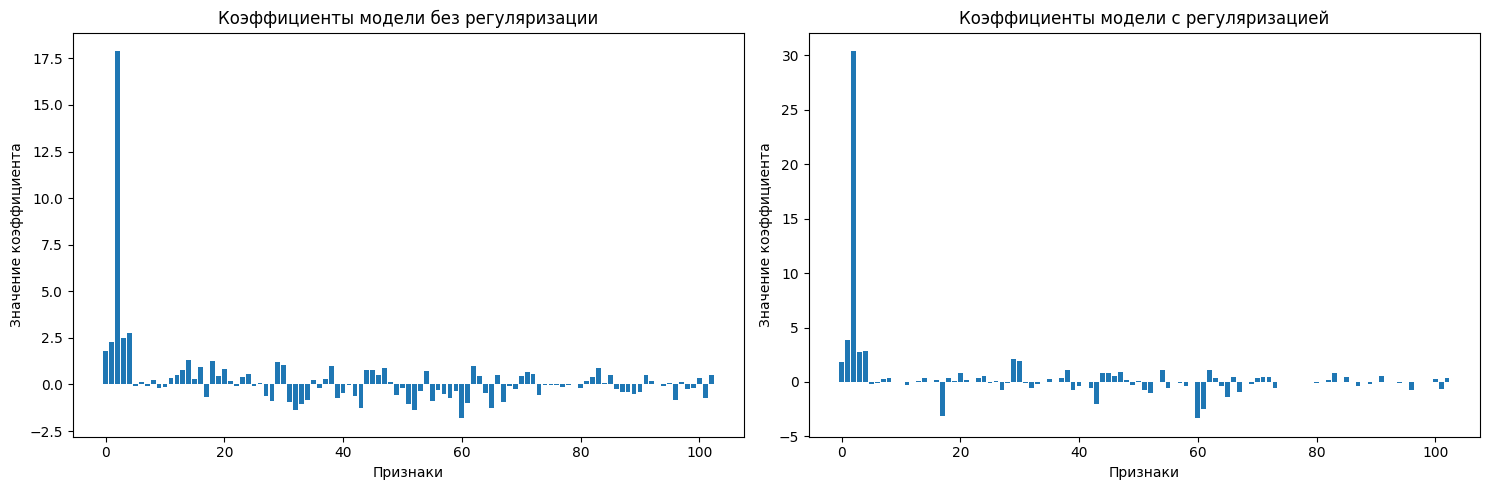

In [221]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()

In [222]:

# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8499
Точность на тестовой выборке: 0.8544

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.73      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [223]:

import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [224]:

# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)


regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


In [225]:
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [229]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.8504344175002858
Точности по каждому фолду: [0.855366190695532, 0.8485872235872236, 0.8501228501228502, 0.8484336609336609, 0.8496621621621622]


При n = 4 :
K-Fold Cross-Validation - Средняя точность: 0.8498508437136985

Точности по каждому фолду: [0.8565286819801007, 0.8464373464373465, 0.8479115479115479, 0.8485257985257986]


При n = 5 :
K-Fold Cross-Validation - Средняя точность: 0.8504344175002858

Точности по каждому фолду: [0.855366190695532, 0.8485872235872236, 0.8501228501228502, 0.8484336609336609, 0.8496621621621622]



При n = 6:
K-Fold Cross-Validation - Средняя точность: 0.8504345493910814

Точности по каждому фолду: [0.8568269762299613, 0.8505620047908605, 0.8479823106688779, 0.847798046803022, 0.849640685461581, 0.8497972723921857]



При n = 7:
K-Fold Cross-Validation - Средняя точность: 0.8499123212464382

Точности по каждому фолду: [0.8557609630266552, 0.8493121238177128, 0.8478073946689596, 0.851676698194325, 0.8475596645882606, 0.8475596645882606, 0.8497097398408945]

 При этом n=5 предпочтительней всего, так как она более стабильна, если смотреть по тому как сильно разделение, значт работает более стабилтно

In [230]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=4, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.8488867562380038
Точности по каждому разделению: [0.8518234165067179, 0.8576583493282149, 0.8447600767754319, 0.8413051823416506]


При n = 4:
ShuffleSplit Cross-Validation - Средняя точность: 0.8496737044145872
Точности по каждому разделению: [0.8453742802303263, 0.8540499040307101, 0.8483685220729367, 0.8509021113243762]

При n = 5:
ShuffleSplit Cross-Validation - Средняя точность: 0.8468023032629558

Точности по каждому разделению: [0.8443761996161229, 0.8489059500959693, 0.8461420345489443, 0.8481381957773513, 0.8464491362763915]

ShuffleSplit Cross-Validation - Средняя точность: 0.8493154190658988

При n = 6:
Точности по каждому разделению: [0.8466026871401152, 0.8492898272552784, 0.850978886756238, 0.850595009596929, 0.8487523992322457, 0.8496737044145873]

Самый лучший по средней точности при n = 6. Но хуже k-fold по отношению точности.

In [228]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.8510594738458389
Точность на тестовых данных: 0.8492249195671249


При 0.2:


Точность на валидационных данных:
 0.8327959465684016

Точность на тестовых данных: 0.8326295585412667

При 0.3:


Точность на валидационных данных: 0.8510594738458389

Точность на тестовых данных: 0.8492249195671249